# Семинар 8: EDA и гипотезы

Сегодня мы будем решать кейс для отдела маркетинга некоторого банка. Задача - исследовать, какие характеристики могут влиять на принятие решения об открытии депозита.

Для начала познакомимся с данными, которые нам предлагают.

1. - age: возраст
2. - job:тип работы
3. - marital: семейный статус
4. - education: уровень образования
5. - default: имеет ли кредит в просрочке
6. - housing: имеет ли клиент жилищный кредит
7. - loan: имеет ли клиент персональный кредит
8. - balance: баланс клиента
9. - contact: тип контакта с клиентом
10. - month: месяц, в котором был последний контакт
11. - day: день, в который был последний контакт
12. - duration: длительность контакта в секундах
13. - campaign: количество контактов с этим клиентом в течение этой кампании
14. - pdays: количество пропущенных дней с момента последней маркетинговой кампании до контакта в этой
15. - previous: количество контактов до этой кампании
16. - poutcome: результат прошлой маркетинговой кампании
17. - deposit: согласился ли клиент открыть депозит



## Знакомство с данными и предобработка

Откроем наши данные:

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('bank_fin.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


Давайте выясним, есть ли здесь пропущенные значения? Найдите, в каких признаках есть пропуски и сколько их:

In [5]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Теперь нам хотелось бы обработать пропущенные значения, однако не все данные отображаются в корректном виде. Обратите внимание на признак balance: пока он воспринимается как строка, хотя должен быть числового формата. Исправим эту проблему:

In [6]:
df['balance'] = df['balance'].str.replace(',00', '')
df['balance'] = df['balance'].str.replace('$','')
df['balance'] = df['balance'].str.replace(' ','')
df['balance'] = df['balance'].astype('float')

Проверим результат:

In [7]:
df['balance']

0        2343.0
1          45.0
2        1270.0
3        2476.0
4         184.0
          ...  
11157       1.0
11158     733.0
11159      29.0
11160       0.0
11161       0.0
Name: balance, Length: 11162, dtype: float64

Теперь, когда численная переменная, отвечающая за баланс, приведена в корректный вид, мы можем обработать в ней пропуски.

Например, заменим на медиану:

In [8]:
df['balance'] = df['balance'].fillna(df['balance'].median())

Итак, признак, отвечающий за баланс клиента, обработан.Теперь осталось разобраться с выбросами для него.

Есть разные стратегии выявления выбросов. Мы будем считать, что выбросы находятся за пределами интервала от  (Q1 - 1.5IQR) до (Q3 + 1.5IQR). 

In [9]:
import numpy as np
Q1 = np.percentile(df['balance'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['balance'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df = df[(df['balance']>=lower)&(df['balance']<=upper)]


Также нам важно проанализировать возраста клиентов, склонных открывать депозит. Для того, чтобы нам было более удобно работать с возрастами, давайте перекодируем количественную переменную в порядковую, выделив следующие группы возрастов:

* '<30'
* '30-40'
* '40-50'
* '50-60'
* '60+'


<AxesSubplot:xlabel='age_group', ylabel='count'>

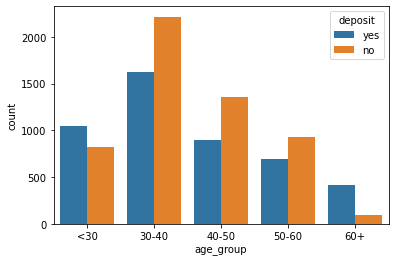

In [11]:
import seaborn as sns
df['age_group'] = pd.cut(df.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
sns.countplot(x="age_group", hue="deposit", data=df)

Также перекодируем образование (порядковый признак):

In [44]:
education_mapper = {"unknown":0, "primary":1, "secondary":2, "tertiary":3}
df["education_map"] = df["education"].replace(education_mapper)

## Время описательных статистик

Давайте узнаем, много ли человек в целом открыли депозиты?


no     5424
yes    4681
Name: deposit, dtype: int64


<AxesSubplot:xlabel='deposit', ylabel='count'>

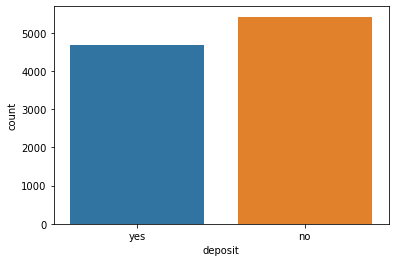

In [26]:
import seaborn as sns
print(df["deposit"].value_counts())
sns.countplot(data = df,x = df['deposit'])

Теперь попробуйте сами с помощью известных вам функций ответить на следующие вопросы:

#### Каков максимальный возраст клиента банка?


In [12]:
df.age.max()

95

#### Какова минимальная длительность разговора с клиентом банка? 


In [13]:
df.duration.min()

2

#### В скольких месяцах была маркетинговая кампания?

In [14]:
#ваш код
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [15]:
len(df.month.unique())

12

#### Сколько всего профессий представлено среди клиентов банка?В какой профессии задействовано наибольшее количество клиентов банка?

In [17]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2254,5715,5078,9939,5243,8712,7283,2617,7570,5424


**Теперь давайте узнаем, есть ли разница в результатах текущей маркетинговой кампании в зависимости от предыдущей. Возможно, люди, которые уже однажды согласились на предложение банка, более склонны принять его вновь. А возможно, ситуация ровно обратная. Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.**


<AxesSubplot:xlabel='poutcome'>

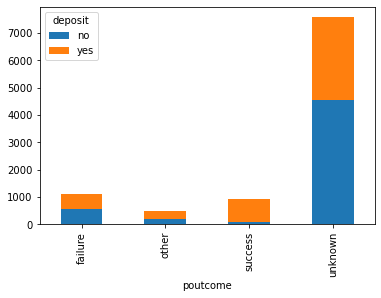

In [19]:
types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')#ваш код

**Теперь давайте узнаем,  какова зависимость результата маркетинговых кампаний от месяца?Временные периоды, сезоны, близость к каким-то праздникам часто влияют на решение клиентов про использование определенных услуг. Рассчитайте, в каком месяце самый большой процент неудач при взаимодействии в текущей маркетинговой кампании. Возможно, этот месяц не является подходящим для проведения подобных акций, и это стоит отметить.**

In [26]:
for i in np.unique(df.month):
    a = round(df[(df.month == i)&(df.deposit == 'no')].shape[0]/df[(df.month == i)].shape[0]*100,2)
    print(i, f'{a}%')

apr 38.19%
aug 55.96%
dec 9.68%
feb 45.56%
jan 60.82%
jul 58.96%
jun 54.89%
mar 10.13%
may 67.86%
nov 58.46%
oct 18.51%
sep 16.55%


## Тестирование гипотез

Давайте теперь проверим предложенные ниже гипотезы. Для каждой гипотезы необходимо сформулировать нулевую и альтернативную гипотезы, подобрать необходимый статистический критерий, провести расчеты и сделать выводы.

#### Отличается ли средняя длительность разговора у клиентов которые согласились открыть депозит и у клиентов, которые не согласились его открыть?

In [27]:
yes = df[df.deposit == 'yes']['duration']
no = df[df.deposit == 'no']['duration']

In [29]:
from scipy import stats
ttest, pval = stats.ttest_ind(yes, no,alternative = 'two-sided')
print(ttest, pval)

51.7599050298825 0.0


In [30]:
print(df[df.deposit == 'yes']['duration'].mean())
print(df[df.deposit == 'no']['duration'].mean())

539.568895535142
221.31674041297936


Изменится ли результат, если заменить альтернативу на одностороннюю?

#### Правда ли, что средний баланс отличается у тех, у кого есть кредит в просрочке и у тех, у кого нет кредита в просрочке?

In [ ]:
# проверьте гипотезу сами

#### Проверим гипотезу о том, что доля взявших депозит равна 0.5

In [35]:
yes_d = len( df[df.deposit == 'yes']['duration'] )

In [38]:
yes_d/len(df)

0.4632360217714003

In [40]:
stats.binom_test(yes_d, len(df), 0.5, alternative = 'two-sided')

1.528995762689583e-13

#### Проверим гипотезу о том, что есть зависимость между уровнем образования и согласием/несогласием открыть депозит

In [41]:
t = df.groupby('education')['deposit'].value_counts().unstack()
t

deposit,no,yes
education,,
primary,832,517
secondary,2839,2239
tertiary,1526,1713
unknown,227,212


In [42]:
stats.chi2_contingency(t, correction=False)

(101.67572341447327,
 6.778848915395374e-22,
 3,
 array([[ 724.09460663,  624.90539337],
        [2725.68748144, 2352.31251856],
        [1738.57852548, 1500.42147452],
        [ 235.63938644,  203.36061356]]))

#### Проверьте гипотезу о том, что есть взаимосвязь между возрастом (категорией) и просрочкой кредита

In [ ]:
# проверьте гипотезу сами

#### Проверьте гипотезу, что есть разница в уровне образования между теми, кто открыл депозит и кто не открыл (используйте критерий Манна-Уитни)

In [46]:
x = df[df.deposit == 'yes']["education_map"]
y = df[df.deposit == 'no']["education_map"]
stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=13890147.5, pvalue=4.226293920155862e-19)

#### Придумайте еще гипотезы, которые можно проверить на ваших данных и проверьте их

In [ ]:
# место для вашей фантазии